In [45]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.decomposition import PCA

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

In [46]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [48]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [49]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM
  01 8th Hat.mid
  02 8th Ride.mid
  03 16th Snare.mid
  04 8th Ride.mid
  05 16th Ride.mid
  06 16th Ride.mid
  07 16th Ride.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  01 8th Hat.mid
  02 8th Snare.mid
  03 4th Snare .mid
  04 8th Ride.mid
  05 8th Snare.mid
  06 8th Toms.mid
  07 8th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/03 Lips n Hips 152BPM
  01 8th Perc.mid
  02 8th Ride.mid
  03 8th Ride .mid
  04 8th Snare.mid
  05 8th Snare.mid
  06 8th Hat.mid
  07 8th Snare.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/04 Maybelline 233BPM
  01 8th Snare.mid
  02 8th Cym.mid
  03 8th Ride.mid
  04 16t

path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/11 Disco Dancer 135BPM
  01 4th Hat .mid
  02 8th Hat.mid
  03 8th Hat.mid
  04 16th Hat.mid
  05 8th Cym.mid
  06 4th Cym.mid
  07 4th Perc.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/12 Sticks Up 155BPM
  01 8th Perc.mid
  02 8th Hat.mid
  03 16th Hat.mid
  04 8th Cym.mid
  05 8th Perc.mid
  06 8th Perc.mid
  07 8th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/13 Mid Groover 111BPM
  01 4th Hat.mid
  02 8th Hat.mid
  03 8th Cym.mid
  04 4th Cym.mid
  05 8th Toms.mid
  06 16th Cym.mid
  07 8th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/14 Disco Smooth 97BPM
  01 16th Hat.mid
  02 16th Cym.mid
  03 16th Hat.mid
  04 16th Toms.mid
  05 16th Cym.mid
  06 2th Snare.mid
  07 16th Hat.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/15 Tribal Shuffle 123BPM
  01 12th Hat.mid
  02 4th Hat.mid
  03 8th Toms.mid
  04 8th Cym.mid
  05 6th Hat.mid
  06 6t


Encoding midi-data
 1000
> -> multi-track = True none
 [INFO] : 
 |  True


In [50]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [51]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/05 16th Ride.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/06 16th Ride.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/07 16th Ride.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/01 8th Hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/02 8th Snare.mid"),
 (9,
  "../datasets/

In [52]:
genres[0][-2:]

["01 Rock'n'Roll", '01 Dancin Rick 166BPM']

In [53]:
dn = config.dataset_dir + 'drum_midi/' + '50´s Drummer MIDI Files'
# for a in os.walk(config.dataset_dir + 'drum_midi'):
#     print(a)
sorted(os.listdir(dn))

['.DS_Store',
 "01 Rock'n'Roll",
 '02 Blues',
 '03 Traditional Pop',
 '04 Country',
 '05 Jazz',
 '06 Soul - Funk',
 '07 Indie']

In [54]:
unique_genres = set(genre[-2] +'/'+ genre[-1] for genre in genres)
len(unique_genres)

110

In [55]:
unique_genres

{'01 Rock n Roll/01 Shuffle 186BPM',
 '01 Rock n Roll/02 Straight 150BPM',
 '01 Rock n Roll/03 Chucky 140BPM',
 '01 Rock n Roll/04 Deddley 150BPM',
 '01 Rock n Roll/05 Diamond 164BPM',
 '01 Rock n Roll/06 Swingin 132BPM Triplets',
 '01 Rock n Roll/07 Domino 167BPM',
 '01 Rock n Roll/08 Offkick 182BPM',
 '01 Rock n Roll/09 Rumblin 192BPM Triplets',
 '01 Rock n Roll/10 Uptime 112BPM',
 "01 Rock'n'Roll/01 Dancin Rick 166BPM",
 "01 Rock'n'Roll/02 Gogo 191BPM",
 "01 Rock'n'Roll/03 Lips n Hips 152BPM",
 "01 Rock'n'Roll/04 Maybelline 233BPM",
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 "01 Rock'n'Roll/06 Moonglow 140BPM",
 "01 Rock'n'Roll/07 Thwag 170BPM",
 "01 Rock'n'Roll/08 Doowoop 140bpm",
 "01 Rock'n'Roll/09 Diddeley 185bpm",
 "01 Rock'n'Roll/10 Ottis 172bpm",
 '02 Blues Rock/01 Clutch 90BPM Triplets',
 '02 Blues Rock/02 Sixeight 58BPM',
 '02 Blues Rock/03 Fire 148BPM',
 '02 Blues Rock/04 Whiteroom 112BPM',
 '02 Blues Rock/05 Bluesshuffle 116BPM',
 '02 Blues Rock/06 Straight 130BPM',
 '02

In [56]:
x_train.shape

(1000, 160, 10, 1)

In [57]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [58]:
x_test = x_train[m:]
x_train = x_train[:m]

In [59]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres[:m])

In [60]:
# i = 0
# j = 399
# plot.single(x_train[i, :50,:,0])
# plot.single(x_train[j, :50,:,0])
# # plot.single(x_train[2a, :50,:,0])
# np.array(labels)[[i,j]]

In [61]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [62]:
latent_dim = 10
epsilon_std = 1.0

In [63]:
vae, encoder, generator = models.build(input_shape, latent_dim)

/Users/mark/src/pattern-recognition/src/models.py:81: UserWarning: Output "reshape_4" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_4" during training.
  vae.compile(optimizer='adam')


In [64]:
batch_size = 128
epochs = 500
params = {'batch_size': batch_size, 'return_y': False}

In [65]:
# phase_mod = 0.01
# whitening = False

In [66]:
# m = 1000
# useDataGenerator = False
# # useDataGenerator = True
# callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

# x = x_train[:m]
# # x = x_train
# # i = [0,1, 7,8, 14,15, 399,400]
# # x = x_train[i]
# # x = np.concatenate([x for _ in range(10)])
# print('x:', x.shape)

# print('batch_size: %i' % batch_size)
# print('update-iterations:', round(epochs * x.shape[0] / batch_size))
# if useDataGenerator:
#     datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
#     history = collections.defaultdict(list)
#     n_batches = datagen.__len__()
#     for e in range(epochs):
#         print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
#         for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
#             print(' Batch %i/%i' % (batch_i,n_batches))
#             x_ = x_batch
#             # x_ = datagen.shuffle_3rd_dim(x_)
#             # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
#             h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
#             for k,v in h.history.items(): 
#                 print(' \\_%s' % k, [round(v_,) for v_ in v])
#                 history[k].append(v)
#             if batch_i >= n_batches:
#                 break
# else:
#     h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
#     history = h.history

In [67]:
fn = config.model_dir + 'hi_res-v3p-4_vae.h5'
# fn = config.model_dir + 'hi_res2c_vae.h5'

In [68]:
# io.save_dict('../logs/','train_loss', history)

In [69]:
# # for suffix, model in [('vae',vae), ('encoder',encoder), ('gen',generator)]:
# #     model.save_weights(dn + prefix + suffix + '.h5', "w")
# vae.save_weights(fn, "w")

In [75]:
vae.load_weights(fn)

In [76]:
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.ylim(0,150)

m (50, 10, 1)


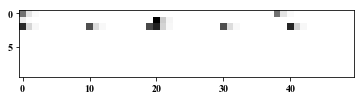

m (50, 10, 1)


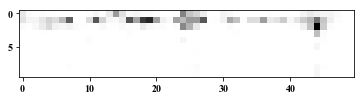

m (50, 10, 1)


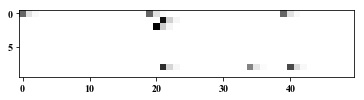

m (50, 10, 1)


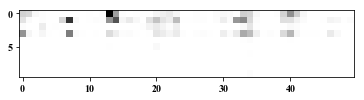

In [77]:
i,j = 0, 10
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [44]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [30]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [31]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Encoder + Decoder (generator)
A model to project inputs on the latent space

In [32]:
# # build a model to project inputs on the latent space
# encoder = Model(encoder_input, z_mean)

In [33]:
# generator_input = Input((latent_dim,))
# generator_layers_ = utils.composition(decoders, generator_input)
# generator = Model(generator_input, generator_layers_)

In [34]:
decoder = generator

## Style transfer

In [35]:
import sklearn.feature_selection
import sklearn.ensemble

In [36]:
# pca = PCA(n_components=3)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [37]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(900, 10)

In [38]:
# a = list({3:[2],'s':[3,3]}.keys())
# np.random.shuffle(a)
# a

In [39]:
import transformation_extraction

In [40]:
best_dims, importances, transformations, min_transformations = \
    transformation_extraction.between_genres(x_train_encoded, genre_dict, amt=50, v=1)


 Genre A: 07 Indie/11 Disco Dancer 135BPM
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 1, importance: 0.223660
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 1, importance: 0.239792
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 7, importance: 0.237871
  genre B: 	04 Country/07 Trainy 100BPM (len: 7)
 	 i: 2, importance: 0.275342
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 7, importance: 0.214520
  genre B: 	03 Jazz/03 Gipsy 218BPM Triplets (len: 10)
 	 i: 7, importance: 0.199528
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 2, importance: 0.327671
  genre B: 	02 Blues/08 Sams 127BPM (len: 7)
 	 i: 1, importance: 0.170800
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 9, importance: 0.247119
  genre B: 	06 Soul - Funk/05 Hip Hop 95BPM (len: 7)
 	 i: 2, importance: 0.228605
  genre B: 	01 Rock n Roll/10 Uptime 112BPM (len: 15)
 	 i: 0, importance: 0.203367
  genre B: 	05 Ja

  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 2, importance: 0.363111

 Genre A: 03 Traditional Pop/02 Frankies Girl 116BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 2, importance: 0.181866
  genre B: 	02 Blues/01 Booze 92BPM (len: 7)
 	 i: 0, importance: 0.241669
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 9, importance: 0.316081
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 1, importance: 0.194517
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 1, importance: 0.199973
  genre B: 	01 Rock'n'Roll/10 Ottis 172bpm (len: 7)
 	 i: 7, importance: 0.193664
  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 9, importance: 0.159044
  genre B: 	01 Rock'n'Roll/01 Dancin Rick 166BPM (len: 7)
 	 i: 6, importance: 0.208397
  genre B: 	07 Indie/01 Rock Shuffle 130BPM (len: 7)
 	 i: 1, importance: 0.232961
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 1, importance: 0.213987
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (l

  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 7, importance: 0.223127
  genre B: 	06 Soul - Funk/03 Cadence Soul 105BPM (len: 7)
 	 i: 3, importance: 0.265422

 Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 1, importance: 0.289382
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 2, importance: 0.351436
  genre B: 	06 Soul - Funk/06 JB Groove 115BPM (len: 7)
 	 i: 2, importance: 0.310813
  genre B: 	02 Blues/05 Cadillac 128BPM (len: 7)
 	 i: 2, importance: 0.278479
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 2, importance: 0.296550
  genre B: 	02 Blues Rock/06 Straight 130BPM (len: 15)
 	 i: 2, importance: 0.371649
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 0, importance: 0.344770
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 4, importance: 0.221862
  genre B: 	02 Blues/06 Vidar Vega 70BPM (len: 7)
 	 i: 2, importance: 0.295644
  genre B: 	07 Indie/16 Medium Flow 120BPM (len: 7)
 	 i: 2,

  genre B: 	04 Country/03 Straight 72BPM Brushes (len: 7)
 	 i: 6, importance: 0.206143
  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 2, importance: 0.261301
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 2, importance: 0.256071
  genre B: 	06 Soul - Funk/10 Syncopated Ride 128BPM (len: 7)
 	 i: 2, importance: 0.296493

 Genre A: 01 Rock n Roll/03 Chucky 140BPM
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 2, importance: 0.165975
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 9, importance: 0.177093
  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 2, importance: 0.433508
  genre B: 	06 Soul - Funk/04 GoGo Soul 100BPM (len: 7)
 	 i: 2, importance: 0.293736
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 5, importance: 0.201665
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 3, importance: 0.193251
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 2, importance: 0.431633
  

  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 1, importance: 0.173131
  genre B: 	06 Soul - Funk/03 Cadence Soul 105BPM (len: 7)
 	 i: 3, importance: 0.297081
  genre B: 	06 Soul - Funk/10 Syncopated Ride 128BPM (len: 7)
 	 i: 3, importance: 0.295896
  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 2, importance: 0.232507
  genre B: 	04 Country/08 Eddie Ed 111BPM (len: 7)
 	 i: 3, importance: 0.188159
  genre B: 	07 Indie/01 Rock Shuffle 130BPM (len: 7)
 	 i: 6, importance: 0.214226

 Genre A: 03 Traditional Pop/04 Love 155BPM
  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 2, importance: 0.322744
  genre B: 	04 Country/04 Snarey 208BPM 3-4 (len: 7)
 	 i: 5, importance: 0.143826
  genre B: 	02 Blues/08 Sams 127BPM (len: 7)
 	 i: 6, importance: 0.215031
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 4, importance: 0.183039
  genre B: 	02 Blues Rock/07 Ballad 77BPM (len: 15)
 	 i: 2, importance: 0.198450
  genre B: 	01 Rock n Roll/10 Uptime

  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 9, importance: 0.389936
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 1, importance: 0.264628
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 8, importance: 0.277428
  genre B: 	02 Blues/04 Mickeys 212BPM 12-8 (len: 7)
 	 i: 6, importance: 0.270053
  genre B: 	05 Jazz/03 Cool 137BPM Brushes (len: 7)
 	 i: 7, importance: 0.282074
  genre B: 	07 Indie/11 Disco Dancer 135BPM (len: 7)
 	 i: 1, importance: 0.270258
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 7, importance: 0.257608

 Genre A: 03 Traditional Pop/05 Your Eyes 80BPM
  genre B: 	07 Indie/15 Tribal Shuffle 123BPM (len: 7)
 	 i: 8, importance: 0.233521
  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 1, importance: 0.197050
  genre B: 	06 Soul - Funk/06 JB Groove 115BPM (len: 7)
 	 i: 2, importance: 0.215273
  genre B: 	01 Rock'n'Roll/01 Dancin Rick 166BPM (len: 7)
 	 i: 9, importance: 0.206219
  genre B: 	02 Blues R

  genre B: 	06 Soul - Funk/02 Boogaloo 120BPM (len: 7)
 	 i: 5, importance: 0.249934
  genre B: 	06 Soul - Funk/03 Cadence Soul 105BPM (len: 7)
 	 i: 0, importance: 0.338959
  genre B: 	06 Soul - Funk/10 Syncopated Ride 128BPM (len: 7)
 	 i: 3, importance: 0.167935
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 9, importance: 0.198547
  genre B: 	07 Indie/05 Halftime 71BPM (len: 7)
 	 i: 9, importance: 0.194588
  genre B: 	04 Country/09 Broonze 122BPM (len: 7)
 	 i: 6, importance: 0.269000
  genre B: 	05 Jazz/04 Silent Tear 234BPM (len: 7)
 	 i: 9, importance: 0.254992
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 5, importance: 0.178181
  genre B: 	07 Indie/03 Moon 137BPM (len: 7)
 	 i: 9, importance: 0.204549
  genre B: 	05 Jazz/03 Cool 137BPM Brushes (len: 7)
 	 i: 7, importance: 0.295062

 Genre A: 02 Blues Rock/10 Uptime 150BPM
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 0, importance: 0.222233
  genre B: 	06 Soul - Funk/03 Caden

  genre B: 	06 Soul - Funk/05 Hip Hop 95BPM (len: 7)
 	 i: 2, importance: 0.336982
  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 1, importance: 0.287105
  genre B: 	02 Blues Rock/07 Ballad 77BPM (len: 15)
 	 i: 4, importance: 0.197050
  genre B: 	01 Rock n Roll/01 Shuffle 186BPM (len: 15)
 	 i: 9, importance: 0.289338
  genre B: 	01 Rock n Roll/05 Diamond 164BPM (len: 15)
 	 i: 9, importance: 0.166696
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 5, importance: 0.223677
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 3, importance: 0.165374
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 9, importance: 0.267497
  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 8, importance: 0.236621
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 9, importance: 0.207948
  genre B: 	03 Traditional Pop/07 Lester Lee 133BPM (len: 7)
 	 i: 1, importance: 0.216028
  genre B: 	07 Indie/06 Swing Funk 102BPM (len: 7)
 	 i: 9, importance: 0.2

  genre B: 	02 Blues/10 Bogeart 122BPM (len: 7)
 	 i: 2, importance: 0.301566
  genre B: 	04 Country/05 Brewer 160BPM (len: 7)
 	 i: 2, importance: 0.340571
  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 8, importance: 0.218312
  genre B: 	01 Rock n Roll/07 Domino 167BPM (len: 15)
 	 i: 2, importance: 0.345551
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 2, importance: 0.328964
  genre B: 	06 Soul - Funk/08 Rim Soul 90BPM (len: 7)
 	 i: 7, importance: 0.284842
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 2, importance: 0.229773
  genre B: 	04 Country/03 Straight 72BPM Brushes (len: 7)
 	 i: 2, importance: 0.220000
  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 2, importance: 0.360085
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 2, importance: 0.248421
  genre B: 	04 Country/02 Marching 94BPM (len: 7)
 	 i: 2, importance: 0.175147
  genre B: 	07 Indie/07 Rock Keeler 133BPM (len: 7)
 	 i: 2, importance: 0.344603
  gen

  genre B: 	07 Indie/04 Titanic 97BPM (len: 7)
 	 i: 1, importance: 0.220495
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 7, importance: 0.212245
  genre B: 	06 Soul - Funk/10 Syncopated Ride 128BPM (len: 7)
 	 i: 0, importance: 0.285979
  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 0, importance: 0.326695
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 7, importance: 0.250095
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 0, importance: 0.266750
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 0, importance: 0.250829
  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 0, importance: 0.266580
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 0, importance: 0.278378
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 7, importance: 0.210518
  genre B: 	07 Indie/18 Disco Weirdo 146BPM (len: 7)
 	 i: 6, importance: 0.294080
  genre B: 	04 Country/05 Brewer 160BPM (len: 7)
 	 i: 0, importa

  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 1, importance: 0.207964
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 1, importance: 0.215347
  genre B: 	02 Blues/09 Leroyes 130BPM (len: 7)
 	 i: 0, importance: 0.127371
  genre B: 	04 Country/01 Calvin 148BPM (len: 7)
 	 i: 2, importance: 0.254818
  genre B: 	05 Jazz/03 Cool 137BPM Brushes (len: 7)
 	 i: 1, importance: 0.338823
  genre B: 	07 Indie/16 Medium Flow 120BPM (len: 7)
 	 i: 0, importance: 0.163617
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 0, importance: 0.281725
  genre B: 	04 Country/07 Trainy 100BPM (len: 7)
 	 i: 2, importance: 0.249466
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 1, importance: 0.244238
  genre B: 	07 Indie/13 Mid Groover 111BPM (len: 7)
 	 i: 3, importance: 0.164363
  genre B: 	02 Blues/02 Nappy Brown 160BPM (len: 7)
 	 i: 6, importance: 0.161194
  genre B: 	05 Jazz/09 West Coast 152BPM Brushes (len: 7)
 	 i: 2, importance: 0.284207
  genre B: 	01

  genre B: 	06 Soul - Funk/07 Ride Swing 95Bpm (len: 7)
 	 i: 2, importance: 0.373550
  genre B: 	07 Indie/15 Tribal Shuffle 123BPM (len: 7)
 	 i: 8, importance: 0.360112
  genre B: 	02 Blues Rock/04 Whiteroom 112BPM (len: 15)
 	 i: 9, importance: 0.210492
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 2, importance: 0.257291
  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 8, importance: 0.292130
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, importance: 0.346273
  genre B: 	02 Blues/08 Sams 127BPM (len: 7)
 	 i: 8, importance: 0.385003
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 2, importance: 0.304147
  genre B: 	06 Soul - Funk/02 Boogaloo 120BPM (len: 7)
 	 i: 2, importance: 0.282727
  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 8, importance: 0.233705
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 3, importance: 0.212728
  genre B: 	05 Jazz/06 Nucleus 172BPM Brushes (len: 7)
 	 i: 0, importance: 0.26

  genre B: 	03 Traditional Pop/02 Frankies Girl 116BPM (len: 7)
 	 i: 2, importance: 0.296930
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 0, importance: 0.338812
  genre B: 	04 Country/09 Broonze 122BPM (len: 7)
 	 i: 6, importance: 0.312383
  genre B: 	06 Soul - Funk/04 GoGo Soul 100BPM (len: 7)
 	 i: 4, importance: 0.216990
  genre B: 	01 Rock'n'Roll/03 Lips n Hips 152BPM (len: 7)
 	 i: 2, importance: 0.325512
  genre B: 	07 Indie/17 Relaxed 88BPM (len: 7)
 	 i: 7, importance: 0.270311
  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 2, importance: 0.315466
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 2, importance: 0.352995
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 2, importance: 0.360386
  genre B: 	04 Country/07 Trainy 100BPM (len: 7)
 	 i: 2, importance: 0.251589
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 2, importance: 0.387884
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 

  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 1, importance: 0.215601
  genre B: 	07 Indie/15 Tribal Shuffle 123BPM (len: 7)
 	 i: 4, importance: 0.211890
  genre B: 	02 Blues Rock/07 Ballad 77BPM (len: 15)
 	 i: 1, importance: 0.168241
  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 2, importance: 0.332491
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, importance: 0.319874
  genre B: 	02 Blues Rock/06 Straight 130BPM (len: 15)
 	 i: 3, importance: 0.142198
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 9, importance: 0.215742
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 4, importance: 0.237256
  genre B: 	02 Blues/09 Leroyes 130BPM (len: 7)
 	 i: 1, importance: 0.191701
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 2, importance: 0.265800
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 4, importance: 0.228284
  genre B: 	07 Indie/16 Medium Flow 120BPM (len: 7)
 	 i: 3, importance: 0.138461
  genre B

  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 6, importance: 0.264495
  genre B: 	07 Indie/14 Disco Smooth 97BPM (len: 7)
 	 i: 4, importance: 0.187101
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 4, importance: 0.173295
  genre B: 	02 Blues/02 Nappy Brown 160BPM (len: 7)
 	 i: 6, importance: 0.202568
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 9, importance: 0.162487
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 2, importance: 0.203112
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 6, importance: 0.162851
  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 6, importance: 0.269876
  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 2, importance: 0.393432
  genre B: 	02 Blues/10 Bogeart 122BPM (len: 7)
 	 i: 9, importance: 0.273207
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 9, importance: 0.148382
  genre B: 	02 Blues Rock/06 Straight 130BPM (len: 15)
 	 i: 1, importance: 0.162682
  genre B: 	04 Cou

  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 2, importance: 0.220243
  genre B: 	02 Blues Rock/07 Ballad 77BPM (len: 15)
 	 i: 2, importance: 0.268589
  genre B: 	02 Blues/03 Noton Bull 192BPM 12-8 Brushes (len: 7)
 	 i: 0, importance: 0.234766
  genre B: 	07 Indie/03 Moon 137BPM (len: 7)
 	 i: 7, importance: 0.167528
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 5, importance: 0.217810
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 2, importance: 0.247723
  genre B: 	04 Country/07 Trainy 100BPM (len: 7)
 	 i: 6, importance: 0.195223
  genre B: 	07 Indie/14 Disco Smooth 97BPM (len: 7)
 	 i: 6, importance: 0.170864
  genre B: 	01 Rock n Roll/05 Diamond 164BPM (len: 15)
 	 i: 5, importance: 0.184498
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 2, importance: 0.233762
  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 2, importance: 0.305546
  genre B: 	07 Indie/04 Titanic 97BPM (len: 7)
 	 i: 7, importance: 0.145383
  genr

  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 1, importance: 0.251023
  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 2, importance: 0.297178
  genre B: 	06 Soul - Funk/03 Cadence Soul 105BPM (len: 7)
 	 i: 0, importance: 0.216403
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 5, importance: 0.201452
  genre B: 	06 Soul - Funk/02 Boogaloo 120BPM (len: 7)
 	 i: 8, importance: 0.234037
  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 2, importance: 0.324617
  genre B: 	02 Blues/02 Nappy Brown 160BPM (len: 7)
 	 i: 4, importance: 0.230983
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 2, importance: 0.185983
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 1, importance: 0.255834
  genre B: 	03 Traditional Pop/04 Love 155BPM (len: 7)
 	 i: 4, importance: 0.162844
  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 8, importance: 0.260762
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 6, import

  genre B: 	07 Indie/18 Disco Weirdo 146BPM (len: 7)
 	 i: 6, importance: 0.326599
  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 1, importance: 0.207230
  genre B: 	06 Soul - Funk/08 Rim Soul 90BPM (len: 7)
 	 i: 2, importance: 0.331546
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 9, importance: 0.360478
  genre B: 	02 Blues/02 Nappy Brown 160BPM (len: 7)
 	 i: 5, importance: 0.306423
  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 8, importance: 0.258946
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 9, importance: 0.351621
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 2, importance: 0.266346
  genre B: 	07 Indie/07 Rock Keeler 133BPM (len: 7)
 	 i: 0, importance: 0.320873
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 5, importance: 0.216276
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 9, importance: 0.235535
  genre B: 	05 Jazz/01 Amel 85BPM Brushes (len: 7)
 	 i: 7, importance: 0.258668
  

  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 8, importance: 0.240534
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 5, importance: 0.199485
  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 5, importance: 0.222339
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 2, importance: 0.285295
  genre B: 	04 Country/04 Snarey 208BPM 3-4 (len: 7)
 	 i: 8, importance: 0.208822
  genre B: 	03 Traditional Pop/04 Love 155BPM (len: 7)
 	 i: 9, importance: 0.171274
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 6, importance: 0.270229
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 6, importance: 0.239732
  genre B: 	07 Indie/07 Rock Keeler 133BPM (len: 7)
 	 i: 6, importance: 0.320904
  genre B: 	01 Rock'n'Roll/01 Dancin Rick 166BPM (len: 7)
 	 i: 6, importance: 0.379981
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 5, importance: 0.212649
  genre B: 	07 Indie/17 Relaxed 88BPM (len: 7)
 	 i: 6, im

  genre B: 	02 Blues Rock/01 Clutch 90BPM Triplets (len: 15)
 	 i: 3, importance: 0.186738
  genre B: 	01 Rock n Roll/01 Shuffle 186BPM (len: 15)
 	 i: 7, importance: 0.265452
  genre B: 	01 Rock n Roll/10 Uptime 112BPM (len: 15)
 	 i: 0, importance: 0.203610
  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 2, importance: 0.371642
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 3, importance: 0.265622
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 2, importance: 0.199083
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 0, importance: 0.267349
  genre B: 	02 Blues/01 Booze 92BPM (len: 7)
 	 i: 7, importance: 0.245062
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 2, importance: 0.304371
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 2, importance: 0.322046
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 2, importance: 0.237523
  genre B: 	02 Blues/02 Nappy Brown 160BPM (len: 7)
 	 i: 7

  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 6, importance: 0.232368
  genre B: 	03 Jazz/03 Gipsy 218BPM Triplets (len: 10)
 	 i: 5, importance: 0.187845
  genre B: 	01 Rock n Roll/05 Diamond 164BPM (len: 15)
 	 i: 0, importance: 0.265077
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 0, importance: 0.314578
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 0, importance: 0.288073
  genre B: 	04 Country/06 Booker 170BPM (len: 7)
 	 i: 5, importance: 0.199867
  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 0, importance: 0.304624
  genre B: 	02 Blues Rock/01 Clutch 90BPM Triplets (len: 15)
 	 i: 0, importance: 0.334810
  genre B: 	06 Soul - Funk/10 Syncopated Ride 128BPM (len: 7)
 	 i: 3, importance: 0.239278
  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 2, importance: 0.192161
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 0, importance: 0.281008
  genre B: 	02 Blues Rock/03 Fire 148BPM (len:

  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 1, importance: 0.317746
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 2, importance: 0.287990
  genre B: 	02 Blues/04 Mickeys 212BPM 12-8 (len: 7)
 	 i: 7, importance: 0.213823
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 9, importance: 0.293814
  genre B: 	06 Soul - Funk/02 Boogaloo 120BPM (len: 7)
 	 i: 2, importance: 0.307528
  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 2, importance: 0.339738
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 2, importance: 0.273375
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 8, importance: 0.244375
  genre B: 	06 Soul - Funk/10 Syncopated Ride 128BPM (len: 7)
 	 i: 2, importance: 0.352083
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, importance: 0.303244
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 2, importance: 0.257860
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 9, import

  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 2, importance: 0.240642
  genre B: 	06 Soul - Funk/05 Hip Hop 95BPM (len: 7)
 	 i: 2, importance: 0.292488
  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 2, importance: 0.294345
  genre B: 	04 Country/07 Trainy 100BPM (len: 7)
 	 i: 2, importance: 0.220707
  genre B: 	07 Indie/16 Medium Flow 120BPM (len: 7)
 	 i: 7, importance: 0.246089
  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 8, importance: 0.308475
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 2, importance: 0.195350
  genre B: 	04 Country/05 Brewer 160BPM (len: 7)
 	 i: 2, importance: 0.237711
  genre B: 	02 Blues Rock/01 Clutch 90BPM Triplets (len: 15)
 	 i: 9, importance: 0.294048
  genre B: 	05 Jazz/04 Silent Tear 234BPM (len: 7)
 	 i: 7, importance: 0.290014
  genre B: 	07 Indie/17 Relaxed 88BPM (len: 7)
 	 i: 1, importance: 0.303885
  genre B: 	01 Rock n Roll/07 Domino 167BPM (len: 15)
 	 i: 1, importance: 0.331128
  genre

  genre B: 	07 Indie/14 Disco Smooth 97BPM (len: 7)
 	 i: 2, importance: 0.390000
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 2, importance: 0.355861
  genre B: 	02 Blues/03 Noton Bull 192BPM 12-8 Brushes (len: 7)
 	 i: 7, importance: 0.291282
  genre B: 	01 Rock'n'Roll/10 Ottis 172bpm (len: 7)
 	 i: 2, importance: 0.314945
  genre B: 	02 Blues/04 Mickeys 212BPM 12-8 (len: 7)
 	 i: 6, importance: 0.362922
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 7, importance: 0.233914
  genre B: 	06 Soul - Funk/07 Ride Swing 95Bpm (len: 7)
 	 i: 2, importance: 0.263038
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 2, importance: 0.320286
  genre B: 	07 Indie/01 Rock Shuffle 130BPM (len: 7)
 	 i: 2, importance: 0.225797
  genre B: 	06 Soul - Funk/08 Rim Soul 90BPM (len: 7)
 	 i: 2, importance: 0.331291
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 5, importance: 0.179386
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 2, impor

  genre B: 	04 Country/05 Brewer 160BPM (len: 7)
 	 i: 5, importance: 0.189285
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 2, importance: 0.193426
  genre B: 	05 Jazz/09 West Coast 152BPM Brushes (len: 7)
 	 i: 2, importance: 0.285866
  genre B: 	03 Traditional Pop/02 Frankies Girl 116BPM (len: 7)
 	 i: 1, importance: 0.264548
  genre B: 	01 Rock'n'Roll/10 Ottis 172bpm (len: 7)
 	 i: 6, importance: 0.308411
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 8, importance: 0.216604
  genre B: 	02 Blues/06 Vidar Vega 70BPM (len: 7)
 	 i: 2, importance: 0.190422
  genre B: 	07 Indie/18 Disco Weirdo 146BPM (len: 7)
 	 i: 6, importance: 0.219863
  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 2, importance: 0.191111
  genre B: 	01 Rock n Roll/06 Swingin 132BPM Triplets (len: 15)
 	 i: 4, importance: 0.297460
  genre B: 	04 Country/09 Broonze 122BPM (len: 7)
 	 i: 6, importance: 0.302847
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, im

  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 9, importance: 0.299282
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 7, importance: 0.185753
  genre B: 	07 Indie/16 Medium Flow 120BPM (len: 7)
 	 i: 9, importance: 0.146842
  genre B: 	05 Jazz/06 Nucleus 172BPM Brushes (len: 7)
 	 i: 0, importance: 0.226400
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 1, importance: 0.325966
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, importance: 0.267773
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 2, importance: 0.281014
  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 6, importance: 0.244827
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 2, importance: 0.246283
  genre B: 	04 Country/06 Booker 170BPM (len: 7)
 	 i: 9, importance: 0.313528
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 9, importance: 0.298258
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 6, import

In [41]:
print('avg importance: %f' % np.mean(importances))

avg importance: 0.255526


In [42]:
# list(min_transformations.items())[0]

In [43]:
for genre_A, d in min_transformations.items():
    print('\nGenre `%s` to: \n dim:\tgenre:' % genre_A)
    for genre_B, vector in d.items():
        print(' %i \t%s' % (np.argmax(vector), genre_B))  


Genre `07 Indie/11 Disco Dancer 135BPM` to: 
 dim:	genre:
 1 	03 Traditional Pop/08 Cecil Cee 101BPM
 1 	02 Blues Rock/08 Shuffle 119BPM Triplets
 7 	01 Rock'n'Roll/08 Doowoop 140bpm
 0 	04 Country/07 Trainy 100BPM
 7 	01 Rock'n'Roll/05 Straight Line 136BPM
 7 	03 Jazz/03 Gipsy 218BPM Triplets
 2 	02 Blues Rock/05 Bluesshuffle 116BPM
 1 	02 Blues/08 Sams 127BPM
 9 	03 Traditional Pop/10 Frewild 152BPM
 0 	06 Soul - Funk/05 Hip Hop 95BPM
 1 	01 Rock n Roll/10 Uptime 112BPM
 2 	05 Jazz/10 Scalis 190BPM 3-4
 2 	05 Jazz/04 Silent Tear 234BPM
 0 	01 Rock'n'Roll/03 Lips n Hips 152BPM
 9 	01 Rock n Roll/02 Straight 150BPM
 3 	06 Soul - Funk/07 Ride Swing 95Bpm
 7 	04 Country/02 Marching 94BPM
 1 	02 Blues/10 Bogeart 122BPM
 9 	01 Rock n Roll/08 Offkick 182BPM
 6 	02 Blues/03 Noton Bull 192BPM 12-8 Brushes
 9 	02 Blues/09 Leroyes 130BPM
 1 	01 Rock n Roll/03 Chucky 140BPM
 4 	07 Indie/18 Disco Weirdo 146BPM
 1 	07 Indie/03 Moon 137BPM
 0 	07 Indie/02 Rock Tribal 125BPM
 0 	01 Rock'n'Roll/07 T

 2 	02 Blues Rock/07 Ballad 77BPM
 0 	02 Blues/03 Noton Bull 192BPM 12-8 Brushes
 7 	07 Indie/03 Moon 137BPM
 0 	01 Rock'n'Roll/08 Doowoop 140bpm
 2 	03 Traditional Pop/03 King Quiza 102BPM
 0 	04 Country/07 Trainy 100BPM
 0 	07 Indie/14 Disco Smooth 97BPM
 0 	01 Rock n Roll/05 Diamond 164BPM
 2 	05 Jazz/05 TNT 116BPM
 2 	02 Blues Rock/09 Bluesballad 97BPM
 0 	07 Indie/04 Titanic 97BPM
 9 	06 Soul - Funk/05 Hip Hop 95BPM
 2 	01 Rock'n'Roll/03 Lips n Hips 152BPM
 0 	04 Country/02 Marching 94BPM
 0 	03 Traditional Pop/08 Cecil Cee 101BPM
 2 	01 Rock'n'Roll/07 Thwag 170BPM
 0 	07 Indie/18 Disco Weirdo 146BPM
 2 	03 Traditional Pop/10 Frewild 152BPM
 0 	03 Jazz/03 Gipsy 218BPM Triplets
 2 	06 Soul - Funk/02 Boogaloo 120BPM
 2 	05 Jazz/01 Amel 85BPM Brushes
 2 	05 Jazz/06 Nucleus 172BPM Brushes
 2 	06 Soul - Funk/06 JB Groove 115BPM
 0 	05 Jazz/02 Another You 170BPM
 0 	06 Soul - Funk/09 Smooth Soul 81BPM
 0 	07 Indie/12 Sticks Up 155BPM
 2 	05 Jazz/09 West Coast 152BPM Brushes

Genre `02 B

(array([285., 227., 810., 197., 126.,  91., 179., 156., 138., 269.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

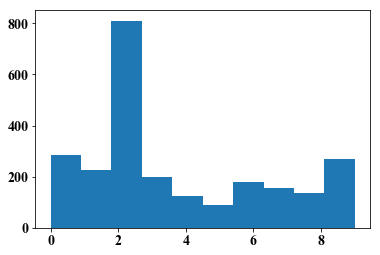

In [44]:
plt.hist(best_dims)

In [45]:
# TODO save as python object (or json)

In [46]:
# def save_transformation_dicts(transformations={}, dn='', v=0):
#     for genre_A, sub_dict in transformations.items():
#         # sub_dict :: {'genre_B_2/genre_B_2': vector}
#         a1, a2 = genre_A.split('/')
#         if a1 not in os.listdir(dn): os.mkdir(dn + a1)
#         if v:
#             print(genre_A)
#             print(sub_dict.keys())
#         io.save_dict(dn + a1, a2, sub_dict)

fn = config.plots_dir + 'transformations-best_dims.pkl'
io.save(best_dims, fn)

fn = config.plots_dir + 'transformations.pkl'
io.save(transformations, fn)

fn = config.plots_dir + 'min_transformations.pkl'
io.save(min_transformations, fn)

'../results/min_transformations.pkl'

In [47]:
t_ = io.load(fn)

In [48]:
# transformations = io.read_categorical_dict_dir(config.plots_dir + 'transformations/')
# min_transformations = io.read_categorical_dict_dir(config.plots_dir + 'min_transformations/') 

In [49]:
list(transformations.keys())[:3]

['07 Indie/11 Disco Dancer 135BPM',
 '06 Soul - Funk/04 GoGo Soul 100BPM',
 '03 Traditional Pop/02 Frankies Girl 116BPM']

In [50]:
len(transformations.keys())

50